In [146]:
#Importing WineData for analysis purpose
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
win=pd.read_csv("Desktop\data2\winemag-data_first150k.csv",index_col=0)
win.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [147]:
#Getting Short overview about Dataset
win.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [148]:
#Information about dataset and Uniqueness in data set
win.info()
win.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


country           48
description    97821
designation    30621
points            21
price            357
province         455
region_1        1236
region_2          18
variety          632
winery         14810
dtype: int64

In [149]:
#since there are some data missing in data set are goal is to fill and handle it according to are need
win['designation'].fillna('designation1',inplace=True)
win['price'].fillna(0,inplace=True)
win['province'].fillna('pro',inplace=True)
win['region_1'].fillna('region_1',inplace=True)
win['region_2'].fillna('region_2',inplace=True)
win['country'].fillna('country',inplace=True)

In [150]:
#Getting an overview about dataset after handling missing dataset
win.info()
win.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150930 non-null object
description    150930 non-null object
designation    150930 non-null object
points         150930 non-null int64
price          150930 non-null float64
province       150930 non-null object
region_1       150930 non-null object
region_2       150930 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


country           49
description    97821
designation    30622
points            21
price            358
province         456
region_1        1237
region_2          19
variety          632
winery         14810
dtype: int64

In [151]:
#Printing whole Dataset for getting overview
win

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,region_2,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,region_2,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,region_2,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,region_2,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,region_2,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [152]:
#Resetting index columns to Countries
win.index=win['country']

In [153]:
win

,country,description,designation,points,price,province,region_1,region_2,variety,winery
country,,,,,,,,,,
US,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
Spain,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,region_2,Tinta de Toro,Bodega Carmen Rodríguez
US,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
US,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
France,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,region_2,Provence red blend,Domaine de la Bégude
Spain,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,region_2,Tinta de Toro,Numanthia
Spain,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,region_2,Tinta de Toro,Maurodos
Spain,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,region_2,Tinta de Toro,Bodega Carmen Rodríguez
US,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström


In [154]:
#Using various alogrithms for predictions purpose
#1)Linear regression
#2)logistic Regression

In [155]:
#assigning Value to x,y variable
y=win.price
win_features=['points']
x=win[win_features]
x.describe()
x.head()

,points
country,
US,96
Spain,96
US,96
US,96
France,95


In [156]:
#linear Regression model
from sklearn.linear_model import LinearRegression
win_model=LinearRegression(fit_intercept=True,normalize=True)
win_model.fit(x,y)
print(win_model.predict(x.head()))

[65.98317868 65.98317868 65.98317868 65.98317868 61.56259047]


In [157]:
#Mean Absolute Error using LinearRegression
from sklearn.metrics import mean_absolute_error
predicted_win_model=win_model.predict(x)
mean_absolute_error(y,predicted_win_model)

16.954124450435994

In [158]:
#predicting model using linearRegresion
win_model.predict([[100]])

array([83.66553153])

In [159]:
#logistic Regression model
from sklearn.linear_model import LogisticRegression
win_model1=LogisticRegression()
win_model1.fit(x,y)
print(win_model1.predict(x.head()))

[0. 0. 0. 0. 0.]


In [160]:
#Mean absolute error for logistic regression
from sklearn.metrics import mean_absolute_error
predicted_win_model1=win_model1.predict(x)
mean_absolute_error(y,predicted_win_model1)

28.688232955674817

In [161]:
#logistic regression prediction

win_model1.predict([[100]])

array([0.])

In [162]:
#importing data visulation library
import matplotlib.pyplot as plt
import seaborn as sns


Text(0,0.5,'Value_counts')

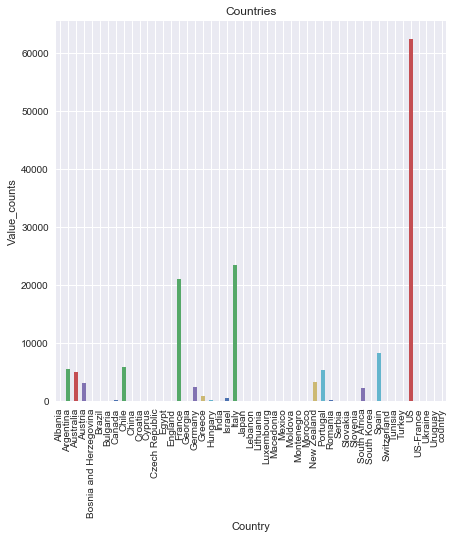

In [163]:
#Plotting bar for countrires
win['country'].value_counts().sort_index().plot.bar(title='Countries',figsize=(7,7))
plt.xlabel('Country')
plt.ylabel('Value_counts')

Text(0,0.5,'value_counts')

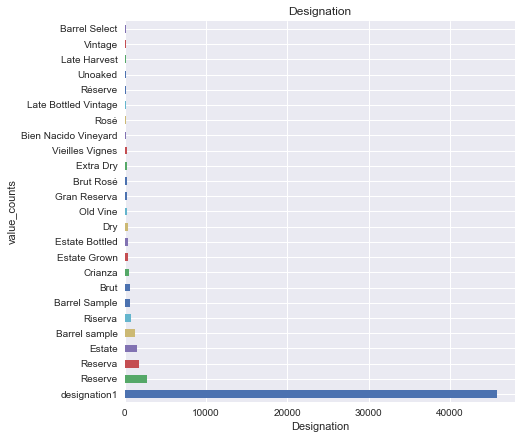

In [164]:
#plotting bar horizontal Designation
win['designation'].sort_index().value_counts().nlargest(25).plot.barh(title='Designation',figsize=(7,7))
plt.xlabel('Designation')
plt.ylabel('value_counts')

Text(0.5,0,'points')

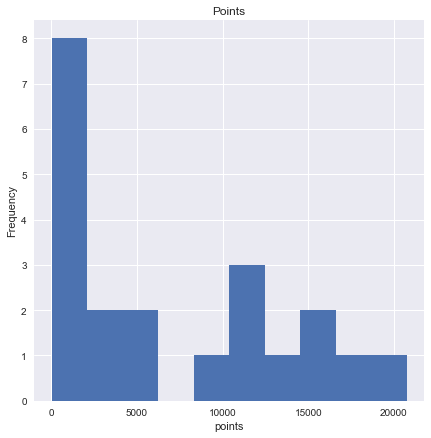

In [165]:
#Creating graphical representation for Points
win['points'].value_counts().plot.hist(title='Points',figsize=(7,7))
plt.xlabel('points')

Text(0.5,0,'price')

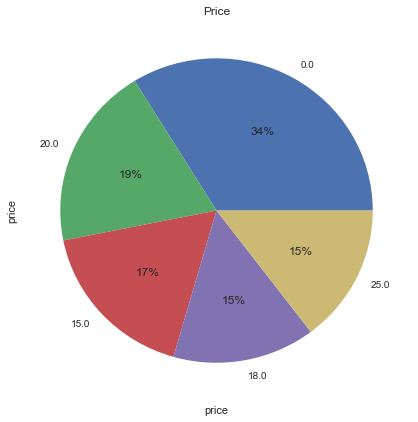

In [166]:
#creating graph for plotting top 5 price categories
win['price'].value_counts().nlargest(5).plot.pie(title='Price',figsize=(7,7),autopct='%0.0f%%')
plt.xlabel('price')

In [167]:
#getting value for top five country
print(win[win.country=='US']['country'].count())
print(win[win.country=='Italy']['country'].count())
print(win[win.country=='France']['country'].count())
print(win[win.country=='Spain']['country'].count())
print(win[win.country=='Chile']['country'].count())

62397
23478
21098
8268
5816


Text(0,0.5,'Value_counts')

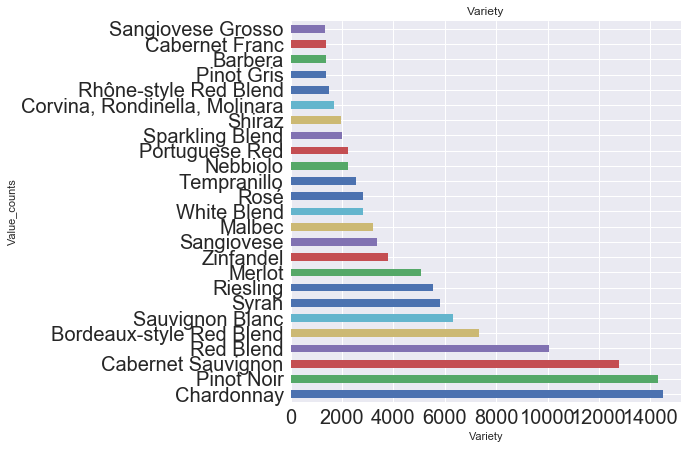

In [168]:
#Creating graph representation for top 25 Variety
win['variety'].sort_index().value_counts().nlargest(25).plot.barh(title='Variety',figsize=(7,7),fontsize=20)
plt.xlabel('Variety')
plt.ylabel('Value_counts')

Text(0,0.5,'Value_counts')

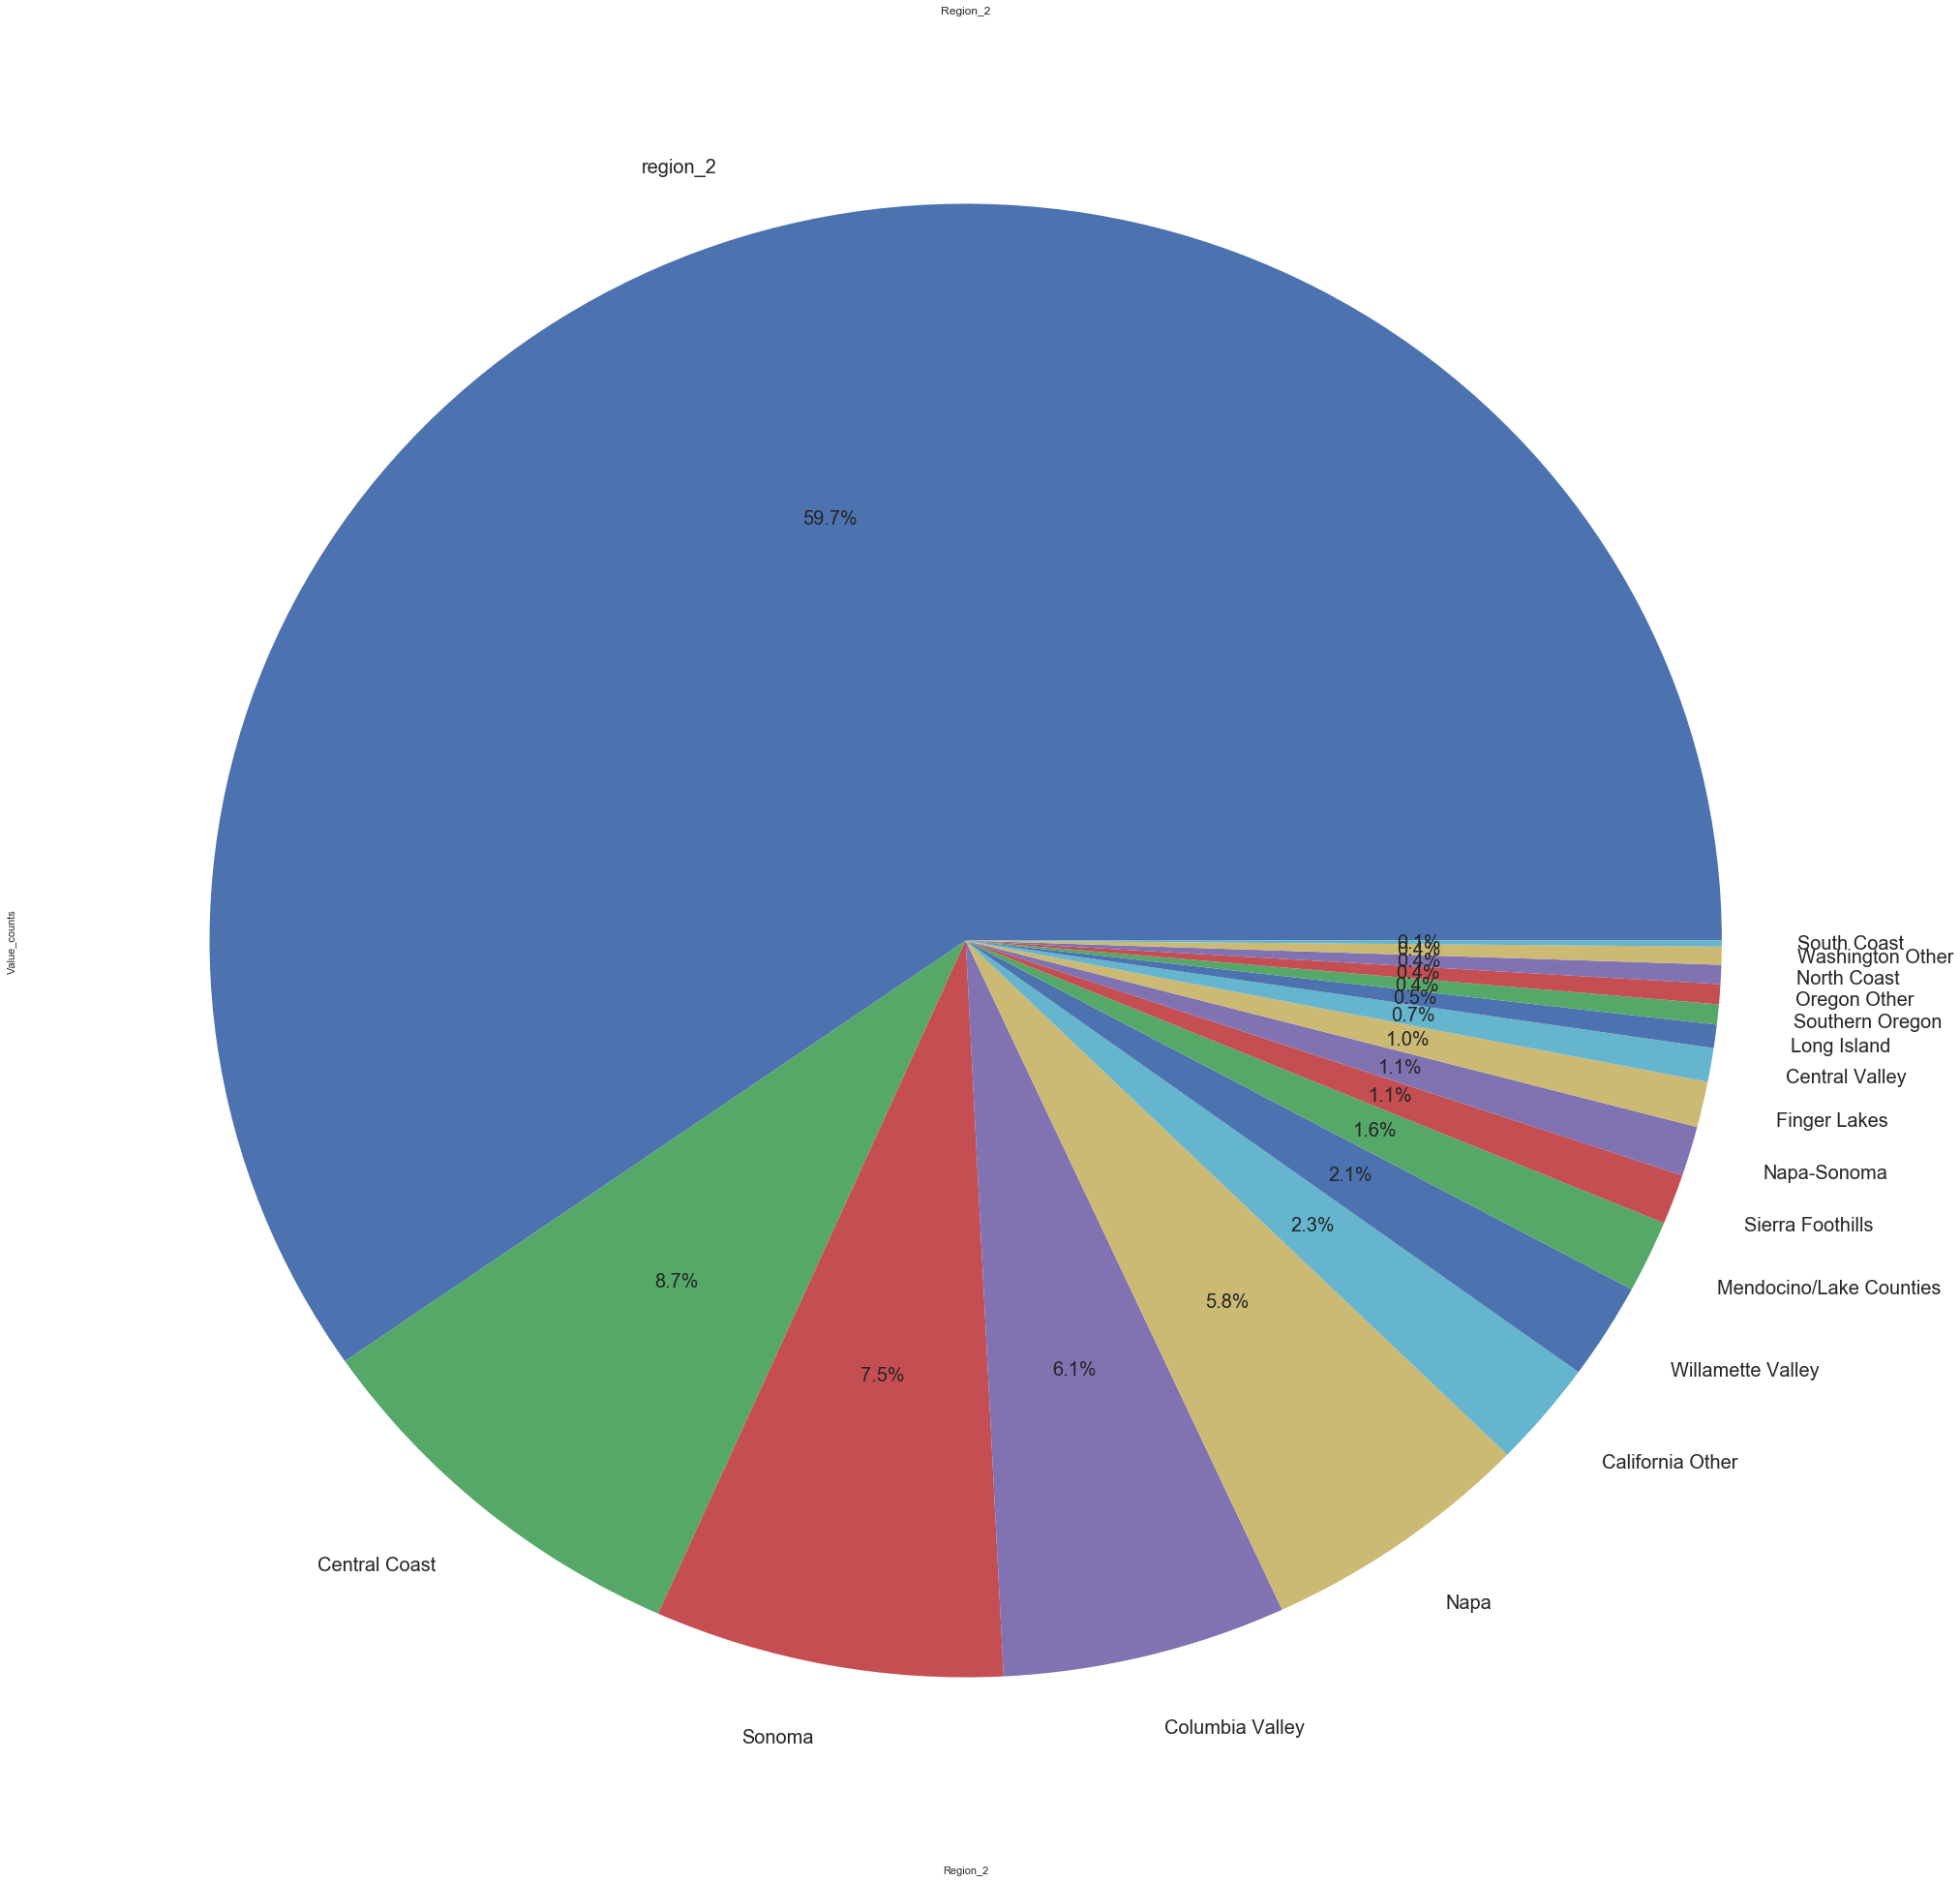

In [169]:
#Plotting Graph for region2 top 18 using pie plot and plotting percentage
win['region_2'].sort_index().value_counts().nlargest(18).plot.pie(title='Region_2',figsize=(35,35),autopct='%1.1f%%',fontsize=20)
plt.xlabel('Region_2')
plt.ylabel('Value_counts')

Text(0,0.5,'value_counts')

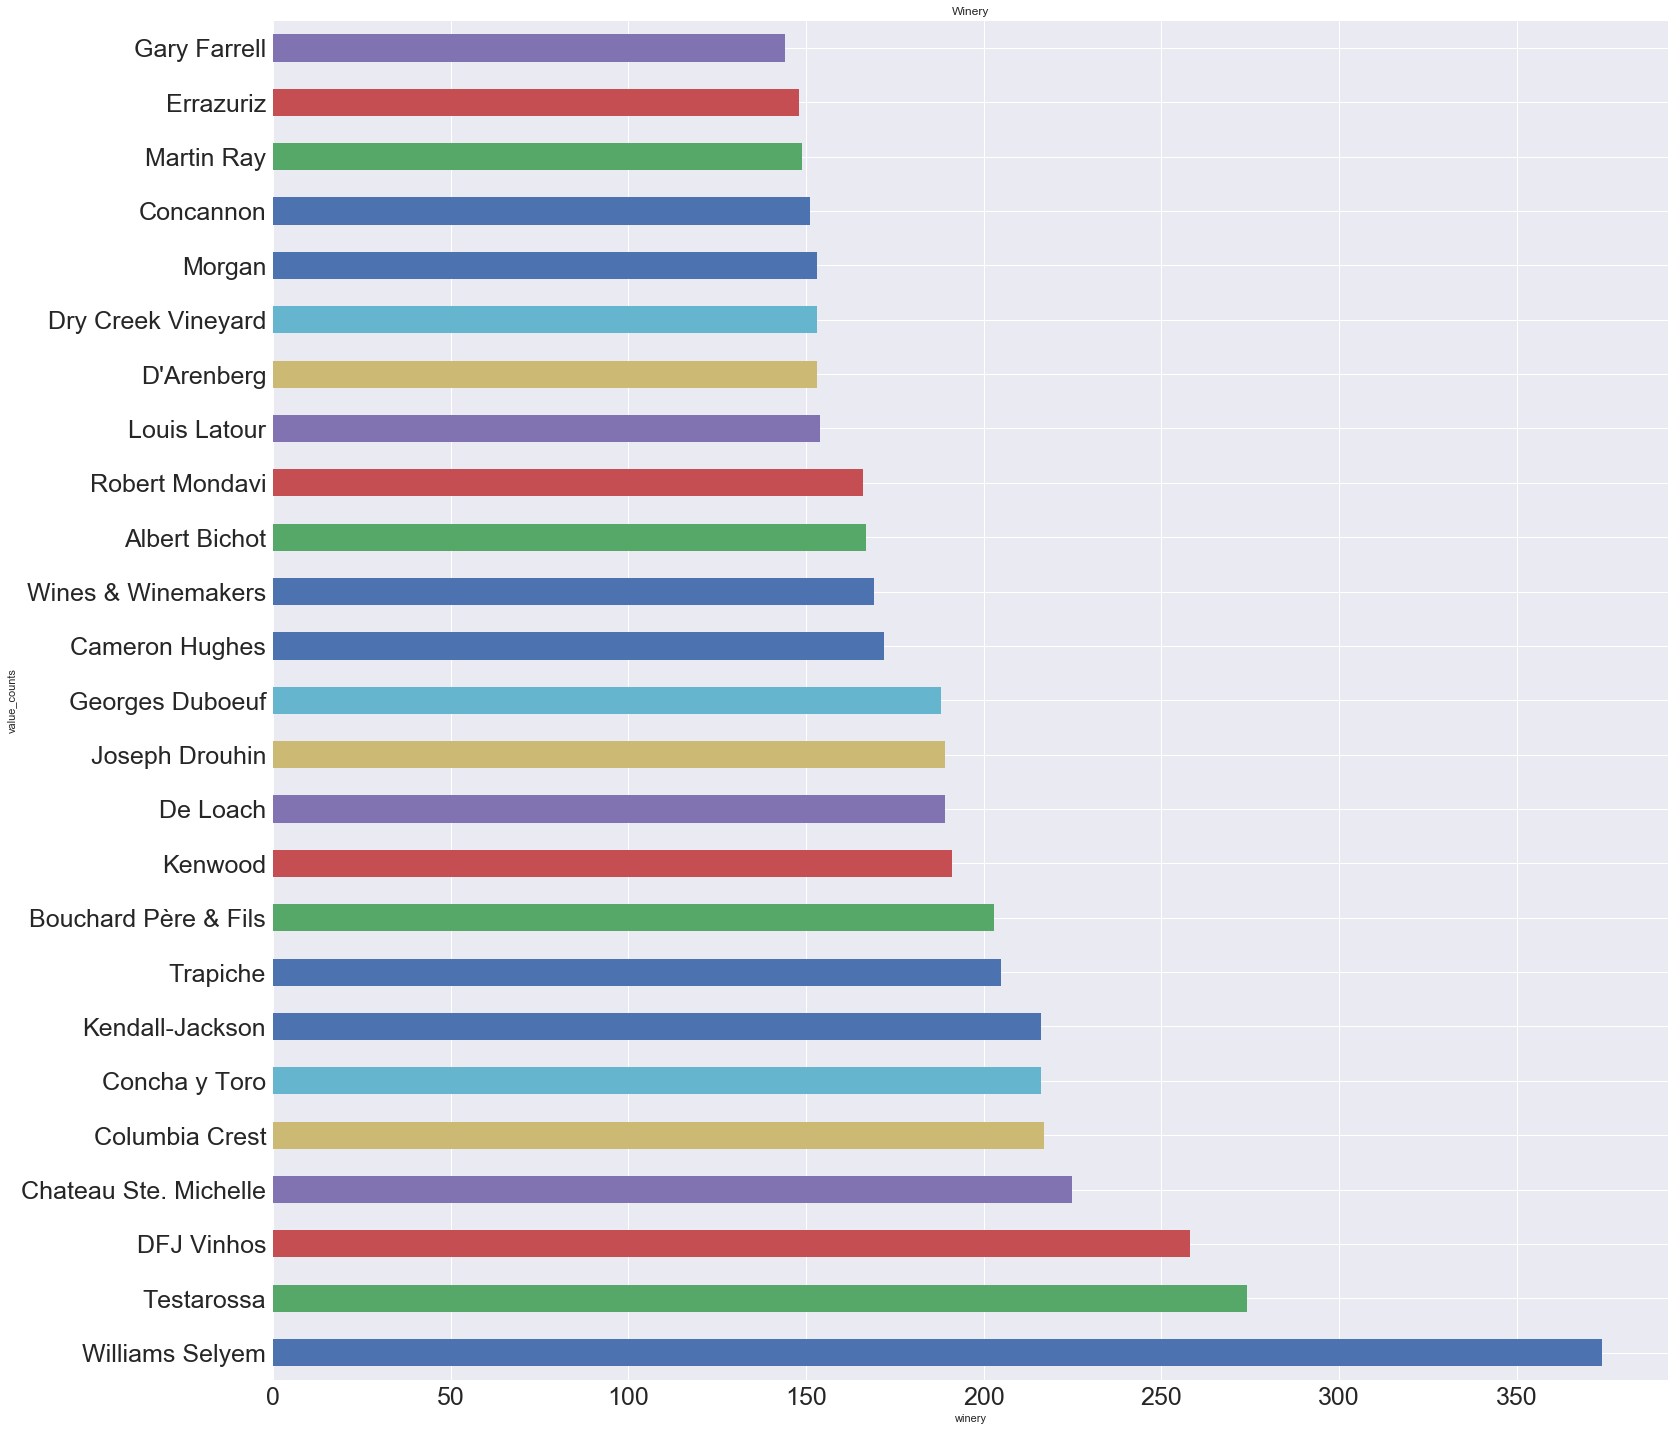

In [170]:
#Ploting the graph for top 25 winery producting wines 
win['winery'].value_counts().sort_index().nlargest(25).plot.barh(title='Winery',figsize=(25,25),fontsize=25)
plt.xlabel('winery')
plt.ylabel('value_counts')

Text(0,0.5,'points')

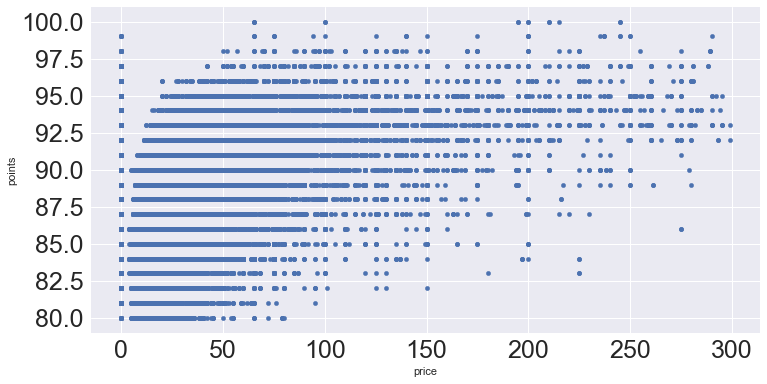

In [171]:
#Creating price and points scatter for better understanding 
win[win['price']<300].sort_index().plot.scatter(x='price',y='points',figsize=(12,6),fontsize=25)
plt.xlabel('price')
plt.ylabel('points')

Text(0,0.5,'points')

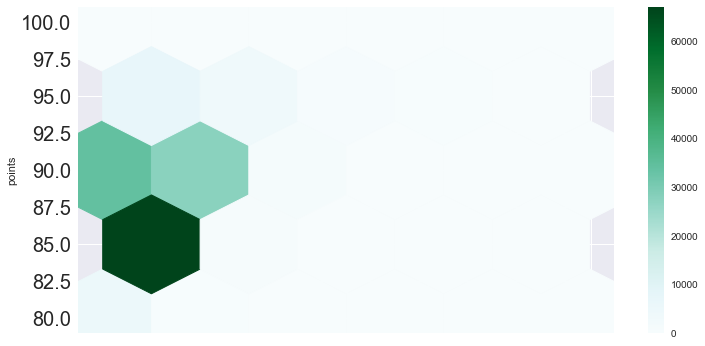

In [172]:
#Creating price and points using hex plot for better understanding
win[win['price']<300].sort_index().plot.hexbin(x='price',y='points',figsize=(12,6),gridsize=5,fontsize=20)
plt.xlabel('price')
plt.ylabel('points')

In [173]:
#Using groupby  functions to plotting price and points along country
win_grp=win.groupby('country').mean()[['price','points']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


Text(0,0.5,'Value_counts')

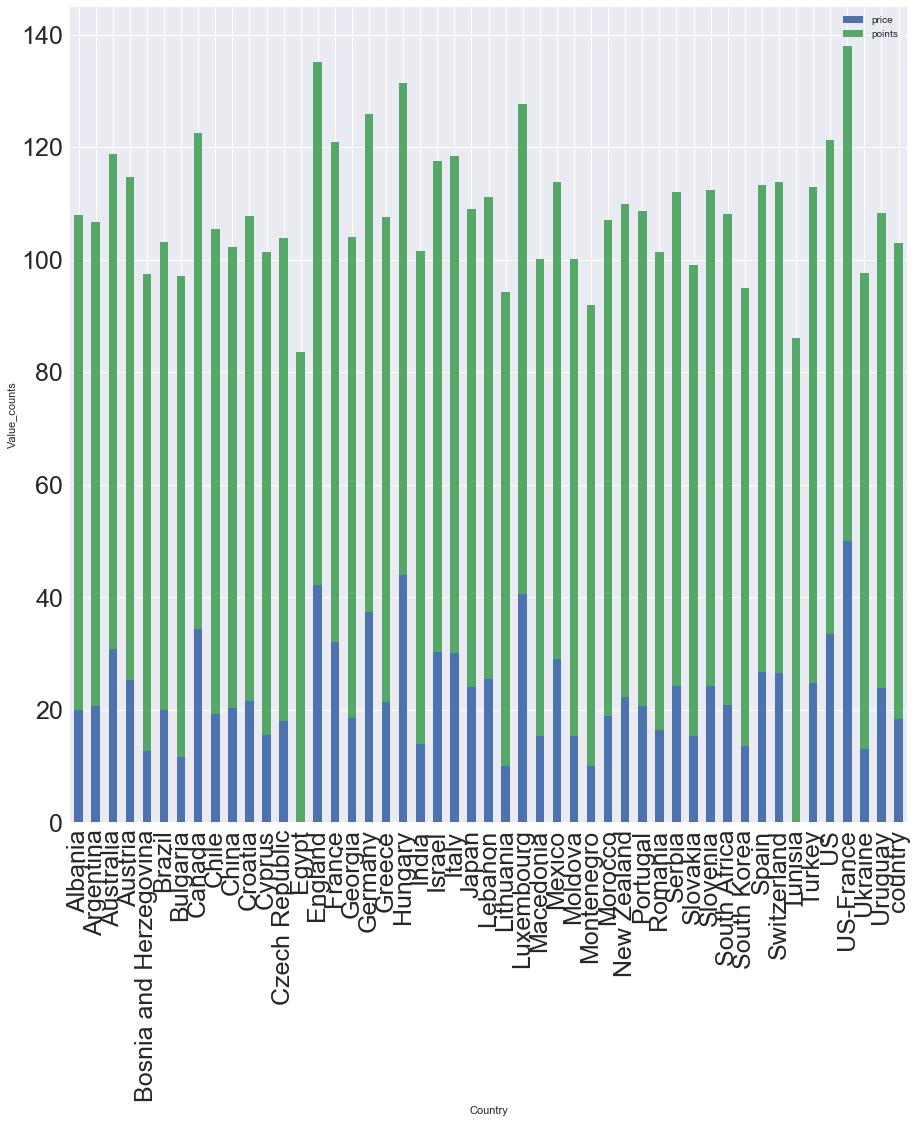

In [174]:
#Plotting groupby function for price and points
win_grp.plot.bar(stacked=True,figsize=(15,15),fontsize=25)
plt.xlabel('Country')
plt.ylabel('Value_counts')

Text(0,0.5,'Value_counts')

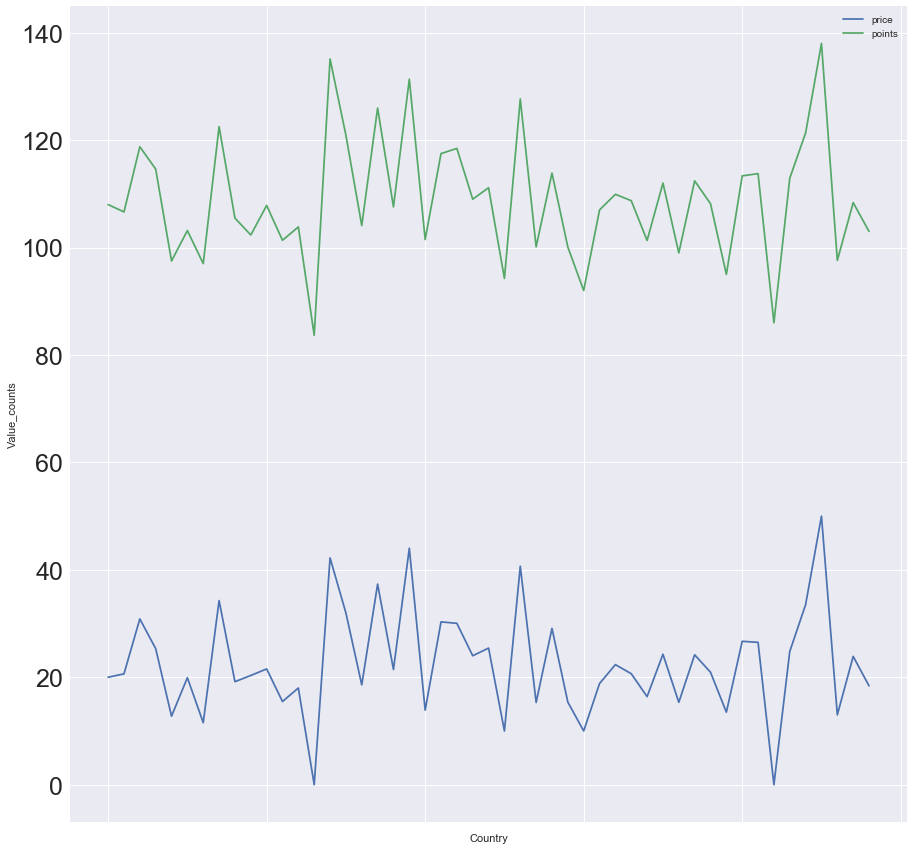

In [175]:
#Plotting line stacked plot on same ground as above
win_grp.plot.line(stacked=True,figsize=(15,15),fontsize=25)
plt.xlabel('Country')
plt.ylabel('Value_counts')

Text(0,0.5,'Value_counts')

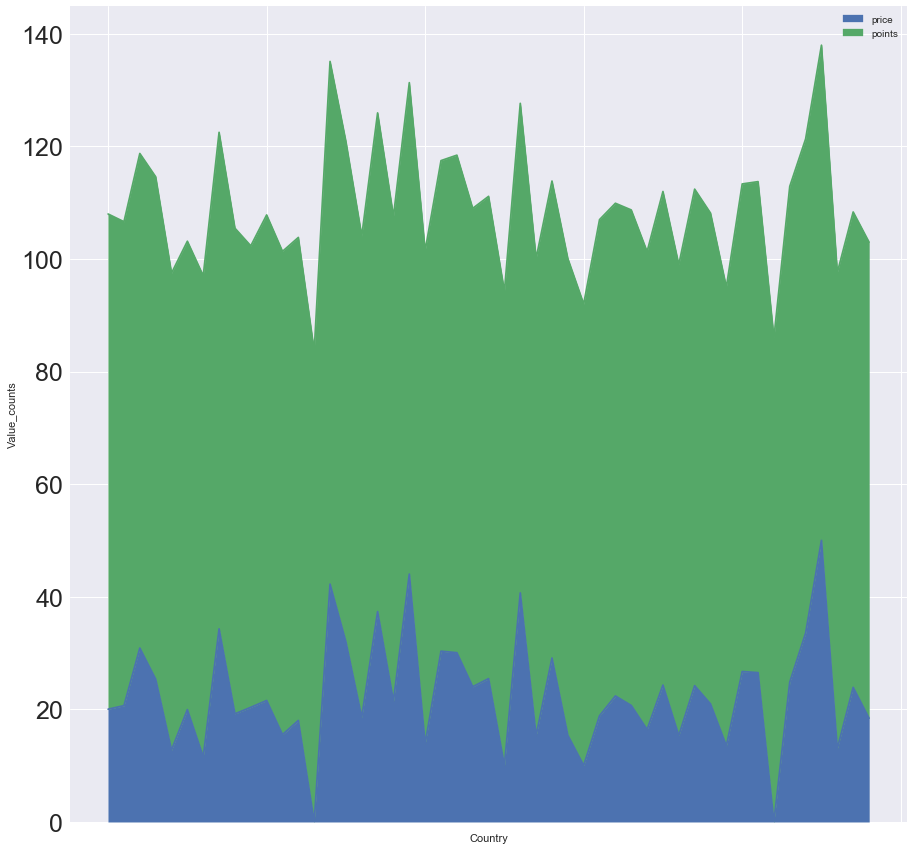

In [176]:
#Plotting area plot stacked =True
win_grp.plot.area(stacked=True,figsize=(15,15),fontsize=25)
plt.xlabel('Country')
plt.ylabel('Value_counts')

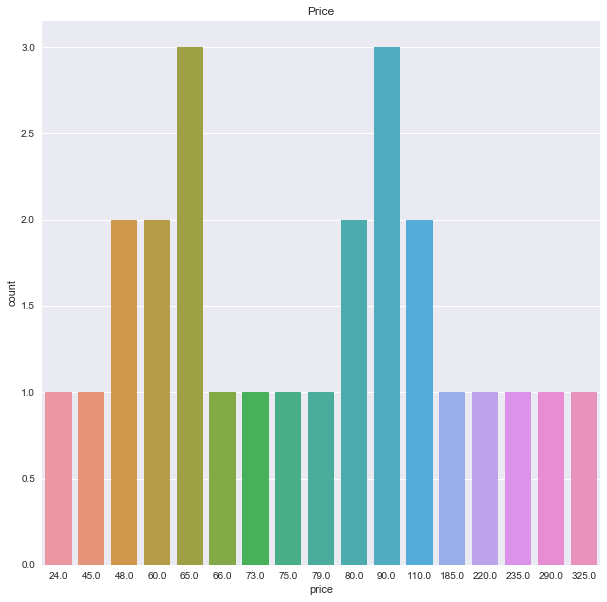

In [178]:
#Plotting countplot for price plot 25 
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Price')
#plt.figsize=(12,12)
sns.countplot(win['price'].head(25))
sns.set(rc={'figure.figsize':(20,40)})
#sns.set(rc={'figure.font':(20)})
sns.set_style('whitegrid')

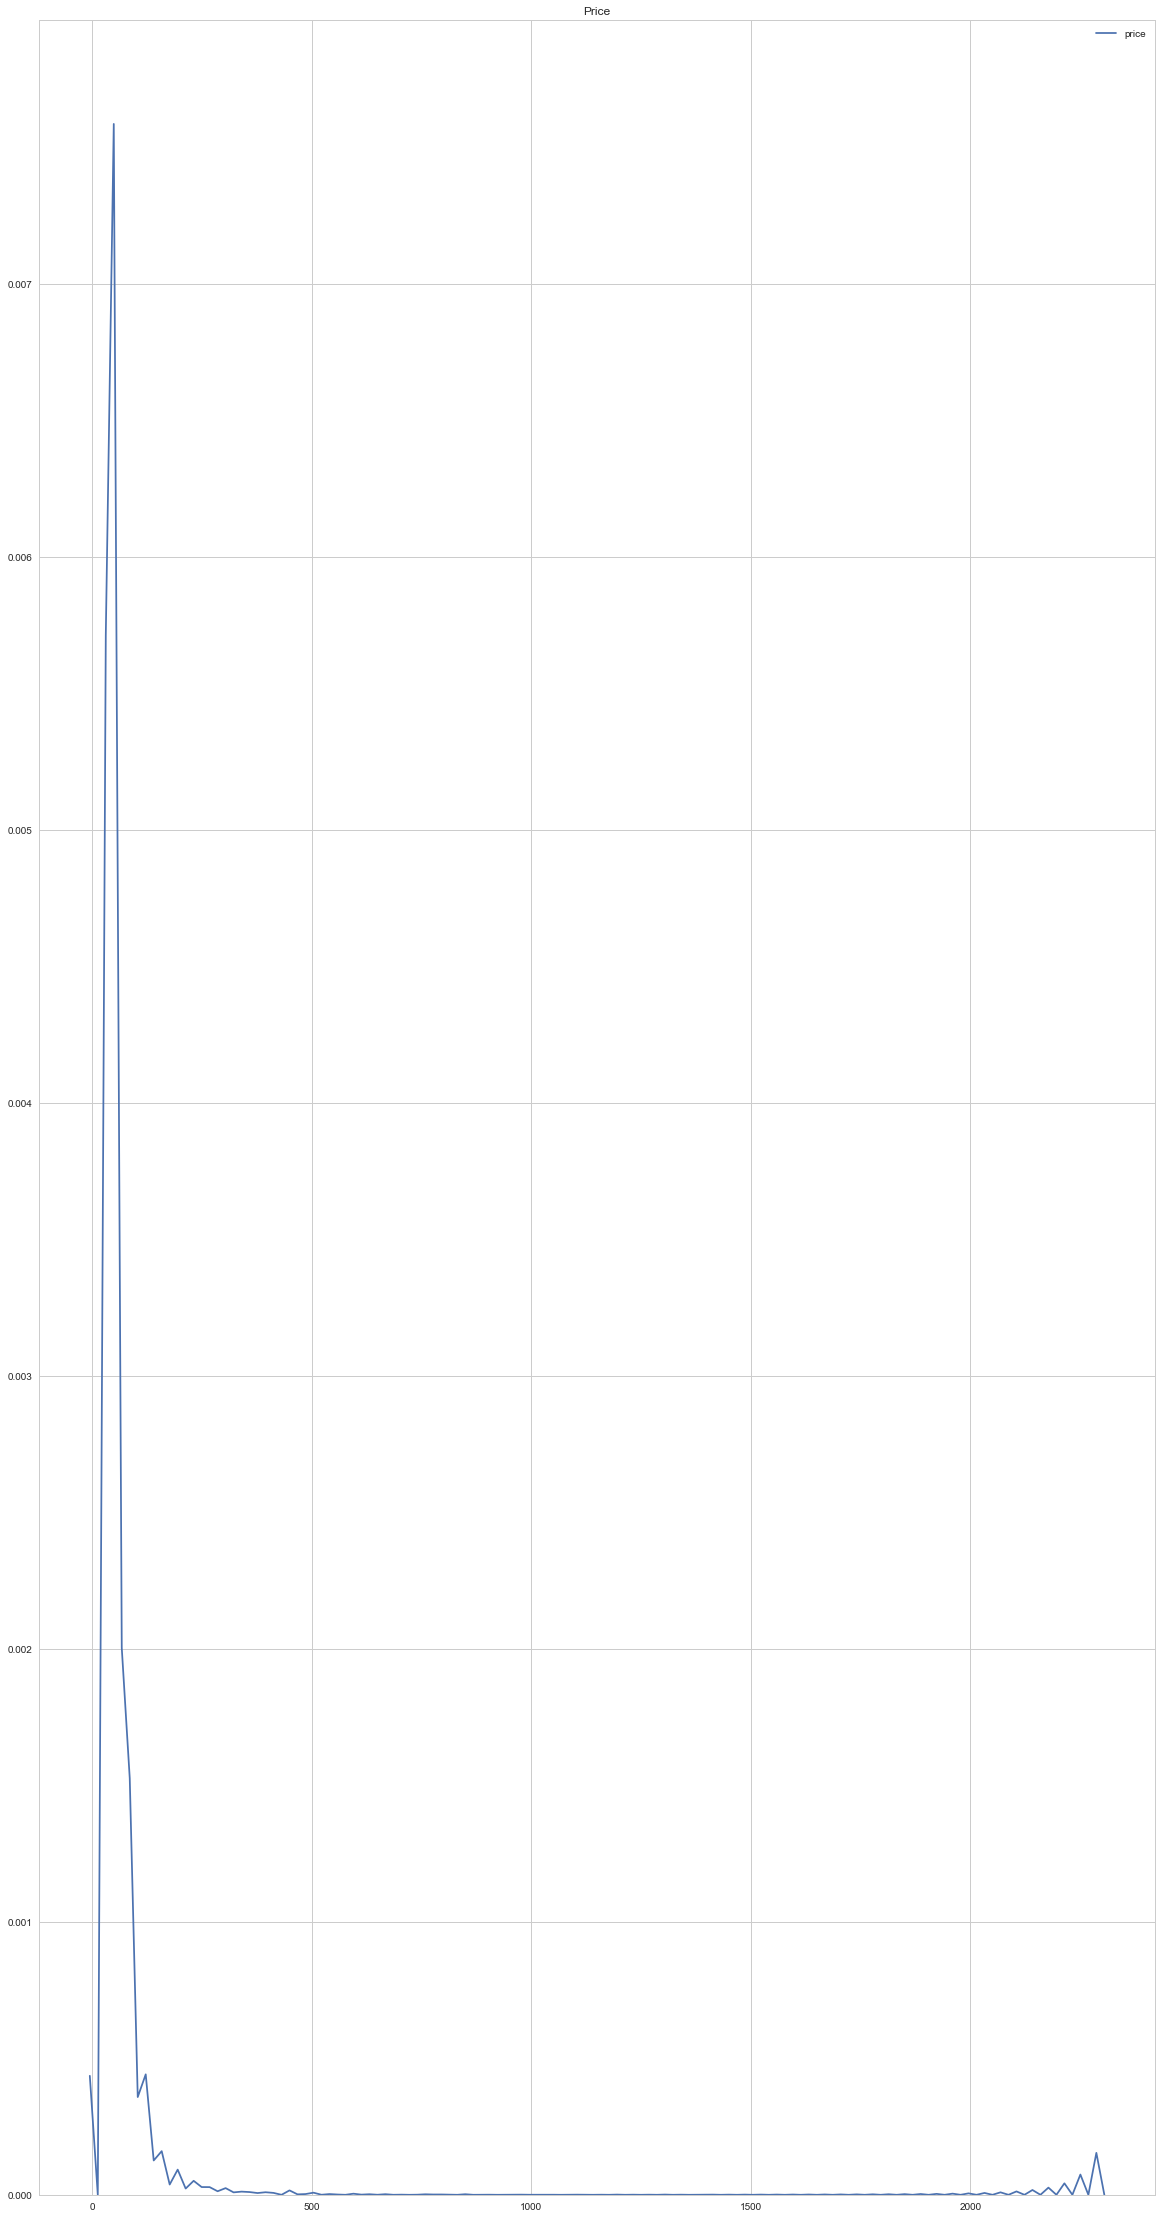

In [179]:
#Plotting graph kdeplot for price 
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Price')
#plt.figsize=(12,12)
sns.kdeplot(win['price'])
sns.set(rc={'figure.figsize':(20,40)})
#sns.set(rc={'figure.font':(20)})
sns.set_style('whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


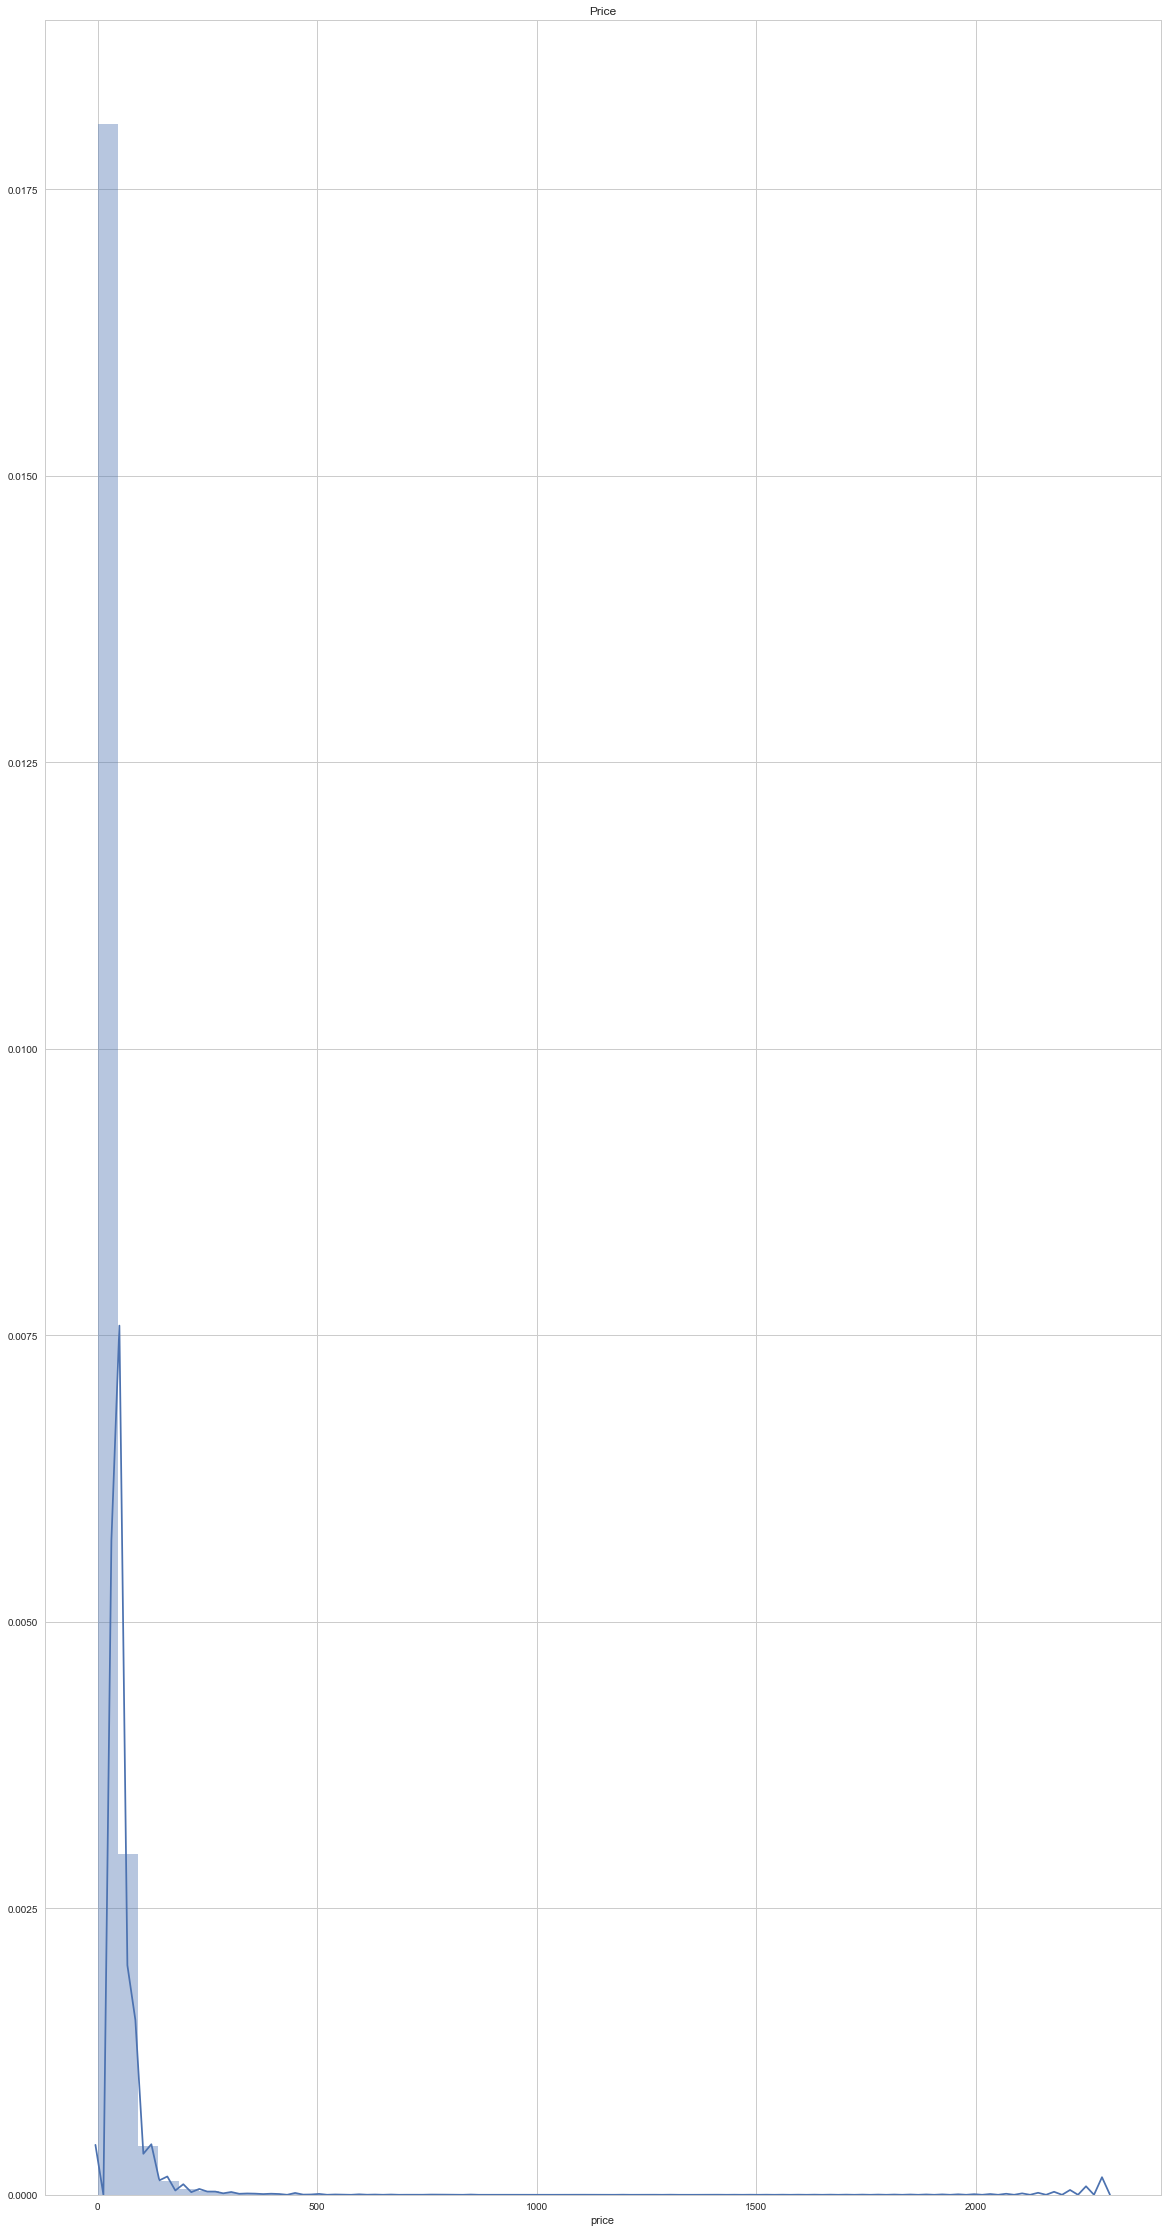

In [180]:
#Distplot for price category
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Price')
#plt.figsize=(12,12)
sns.distplot(win['price'])
sns.set(rc={'figure.figsize':(20,40)})
#sns.set(rc={'figure.font':(20)})
sns.set_style('whitegrid')

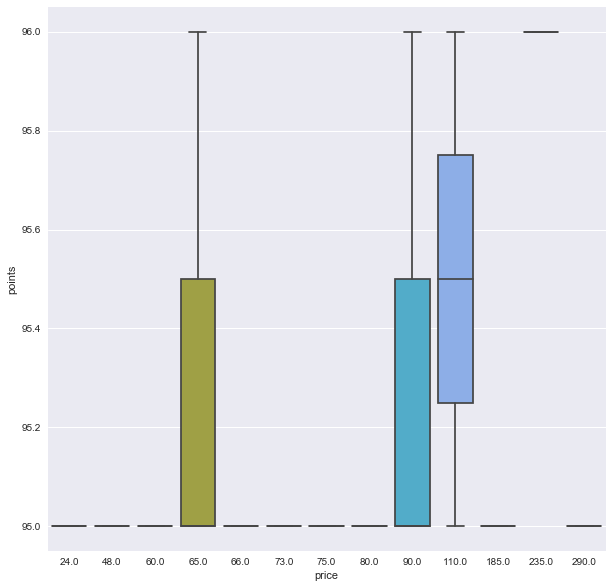

In [181]:
#boxplot for price 
import seaborn as sns
df=win[win['price']<300].head(20)
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='price',y='points',data=df)

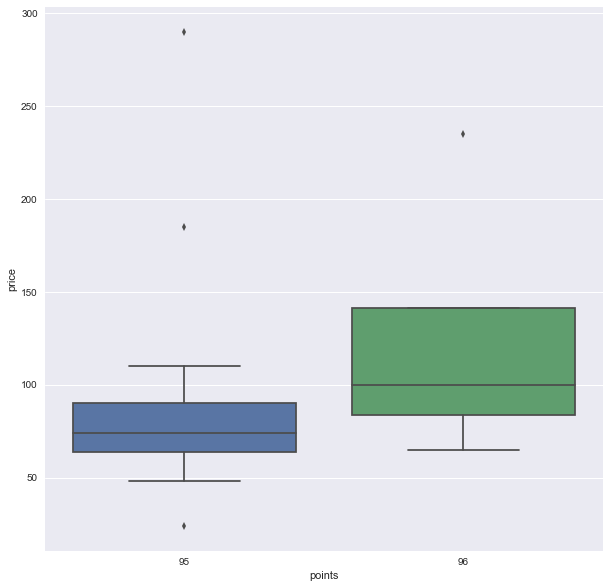

In [182]:
#boxplot for points
import seaborn as sns
dp=win[win['points']<100]
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='points',y='price',data=df)

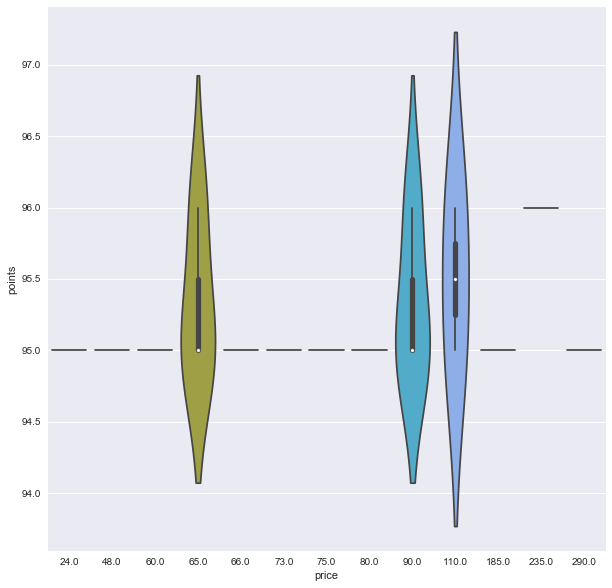

In [183]:
#plotting for violinplot
sns.violinplot(x='price',y='points',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


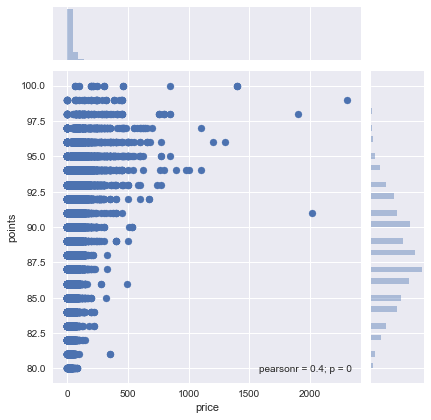

In [184]:

dt=win[win['price']<2400]
sns.jointplot(x='price',y='points',data=dt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


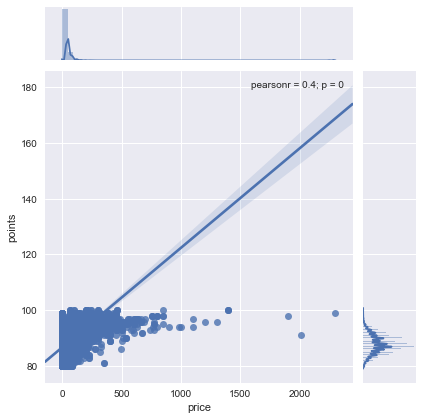

In [185]:
#Plotting jointplot for price and points using reg
dt=win[win['price']<2400]
sns.jointplot(x='price',y='points',data=dt,kind='reg')

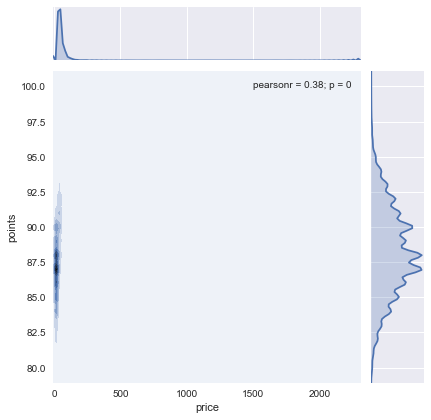

In [186]:
#Plotting jointplot for price and points using kernel density estimation
dt=win[win['price']<2400].head(50000)
sns.jointplot(x='price',y='points',data=dt,kind='kde',)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


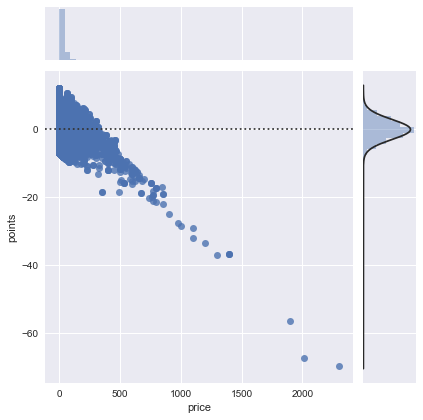

In [187]:
#Plotting jointplot for price and points using resid
dt=win[win['price']<2400]
sns.jointplot(x='price',y='points',data=dt,kind='resid')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


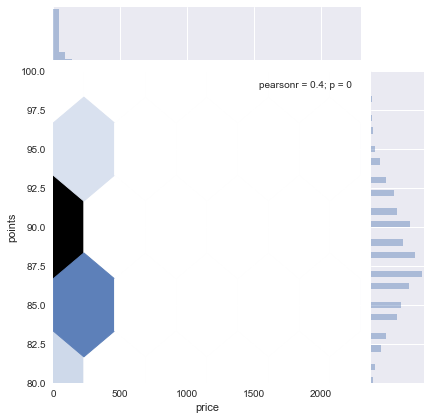

In [188]:
#Plotting jointplot for price and points using hex
dt=win[win['price']<2400]
sns.jointplot(x='price',y='points',data=dt,kind='hex',gridsize=5)

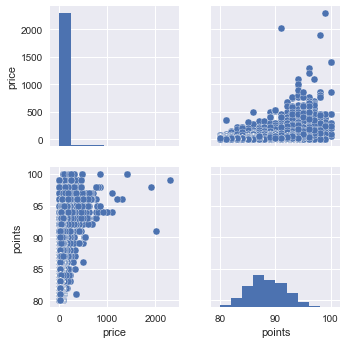

In [189]:
#generating comparsion plot between price and points
sns.pairplot(win[['price','points']])

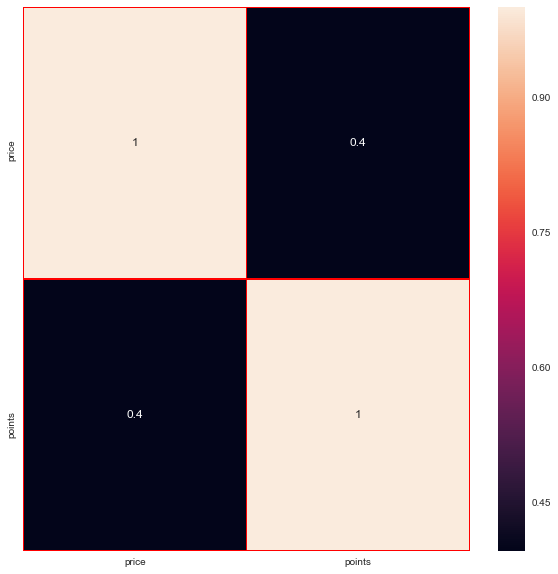

In [190]:
#heatmap for price and point  using correlations
f=win.loc[:,['price','points']].corr()
sns.heatmap(f,annot=True,linecolor='red',linewidth=0.5)

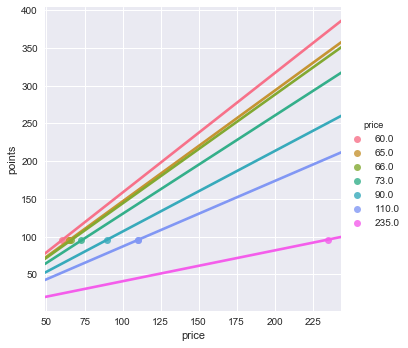

In [191]:
#Generating linear plot for price for top 10
sns.lmplot(x='price',y='points',hue='price',data=dt.head(10),fit_reg=True)

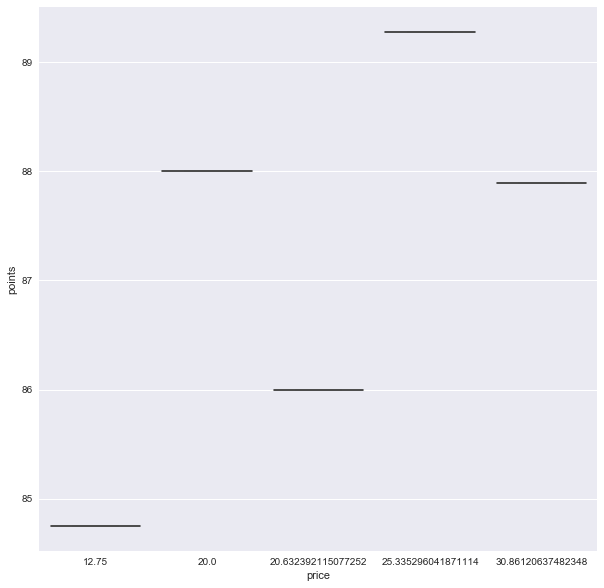

In [192]:
#Generating boxplot for groupplot 
sns.boxplot(x='price',y='points',data=win_grp.head(5))